In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [41]:
df = pd.read_csv("prices.csv")
df = df[df.symbol == "GOOG"]

In [42]:
df.head()

,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [43]:
df.shape

(1762, 7)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 439 to 850963
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [45]:
df.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,667.988556,667.732200,662.013391,673.341401,4.051179e+06
std,159.812252,159.790218,159.052972,160.469786,2.933261e+06
min,438.310758,436.070761,433.630737,442.280760,7.900000e+03
25%,548.639605,547.364993,542.753834,553.582514,1.901175e+06
50%,613.846067,614.161057,609.356057,619.111038,3.642400e+06
75%,749.962820,749.452515,742.882817,756.218456,5.165425e+06
max,1226.802152,1220.172036,1218.602083,1228.882066,2.976060e+07


In [46]:
forecast_col = 'close'
forecast_out = 5
test_size = 0.2

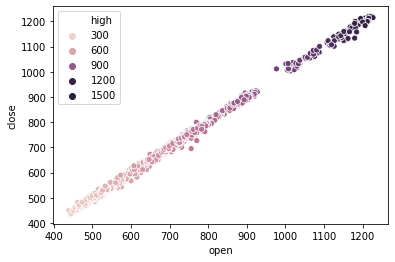

In [47]:
sns.scatterplot(x = df['open'], y = df['close'], hue = df['high'])
plt.show()

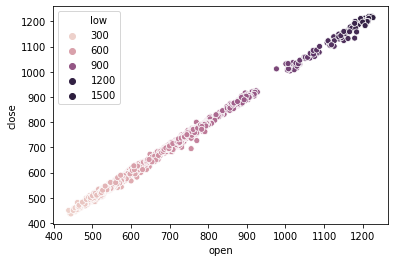

In [48]:
sns.scatterplot(x = df['open'], y = df['close'], hue = df['low'])
plt.show()

In [51]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_test) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

# print(response)
print(score)

0.9481024935723803


In [53]:
learner.intercept_

668.3392090536976

In [54]:
learner.coef_

array([154.54965676])

In [55]:
import sklearn.metrics as metrics

In [56]:
r2_sk = metrics.r2_score(Y_test, forecast)

In [57]:
print(r2_sk)

0.9481024935723803


In [59]:
N=Y_test.shape[0]
p=1
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)


Adjusted-R2 :  0.9479542149825871


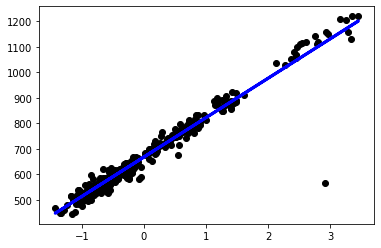

In [64]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, forecast, color='blue', linewidth=3)
plt.show()